/home/yuanh/.local/lib/python3.7/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/home/yuanh/.local/lib/python3.7/site-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


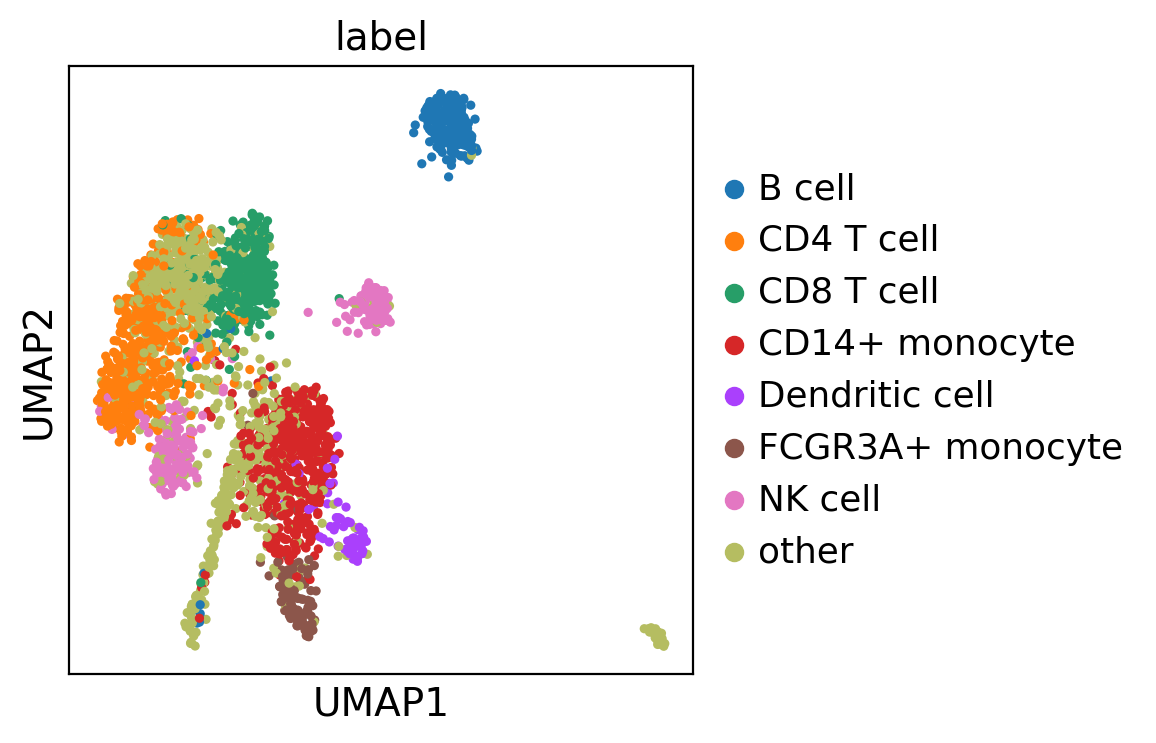

In [1]:
import anndata
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd

ad_atac = anndata.read_h5ad('/home/yuanh/sc_basset/datasets/10x_ARC_PBMC/ad_atac.h5ad')
ad_rna = anndata.read_h5ad('/home/yuanh/sc_basset/10x_ARC_PBMC/adam_32/interpret/annotation/ad_scvi_annotate.h5ad')
ad_atac.obs['label']=ad_rna.obs['cell_type']

sc.set_figure_params(vector_friendly=True, format='pdf', dpi=100)
ad_atac.obsm['projection'] = pd.read_csv('projection.csv', index_col=0).values
sc.pp.neighbors(ad_atac, use_rep='projection')
sc.tl.umap(ad_atac)

f = sc.pl.umap(ad_atac, color=['label'], return_fig=True)
f.savefig('umap_label.pdf')